# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Determinación-de-los-parámetros-de-los-retardadores" data-toc-modified-id="Determinación-de-los-parámetros-de-los-retardadores-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Determinación de los parámetros de los retardadores</a></div><div class="lev2 toc-item"><a href="#Parte-experimental" data-toc-modified-id="Parte-experimental-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Parte experimental</a></div><div class="lev2 toc-item"><a href="#Parte-numérica" data-toc-modified-id="Parte-numérica-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Parte numérica</a></div><div class="lev2 toc-item"><a href="#Ajuste-sencillo" data-toc-modified-id="Ajuste-sencillo-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Ajuste sencillo</a></div><div class="lev2 toc-item"><a href="#Definición-de-funcion-de-ajuste" data-toc-modified-id="Definición-de-funcion-de-ajuste-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Definición de funcion de ajuste</a></div><div class="lev2 toc-item"><a href="#Fitting-to-matrices---2:-completo" data-toc-modified-id="Fitting-to-matrices---2:-completo-15"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Fitting to matrices - 2: completo</a></div><div class="lev2 toc-item"><a href="#Fitting-to-matrices---2:-solo-angulos" data-toc-modified-id="Fitting-to-matrices---2:-solo-angulos-16"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Fitting to matrices - 2: solo angulos</a></div>

# Determinación de los parámetros de los retardadores

**Autor**: Luis Miguel Sanchez Brea

**Fecha**:   12/03/2018

**Objetivo**: Ecograb project, polariscope callibration

**Configuración**:

1. Diodo láser de Roithner .... de longitud de onda $\lambda$=850 nm (corriente = 314 mA).
1. Lente colimadora de Thorlabs DG10-600-B.
1. Difusor.
1. Lámina retardadora $\lambda/4$ ... de Throlabs para hacer el haz de luz circular.
1. Polarizador 1 Thorlabs LPNIRE100-B.
1. Retardador  2 $\lambda/4$ Thorlabs WPQ10E-850-SP
1. Polarizador 4 Thorlabs LPNIRE100-B.




**Procedimiento**:

Se conocen los parámetros y ángulos de P1 y P4. Están cruzados a 0 y 90 grados

1. Se interpone las láminas retardadoras R1 y  R2

1. Se deja P1 y P2 en un ángulo fijo.

1. Se hace un doble bucle for para R1 y R2.



**Resultado**

1. Posición del ángulo de R1 y R2.
1. Parámetros de R1 y R2



In [1]:
from __future__ import print_function, division

# configuration
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# import modules
from phyton_optics import sp, plt, mm, um, nm, degrees, np
import phyton_optics.polarization_stokes as polarization
from phyton_optics.polarization_stokes import (
    intensity, polarized_light, polarizer_linear, quarter_waveplate, rotate_mueller, 
    diattenuating_retarder, retarder, vacuum)

from polarimeter.polarimeter import (get_polarimeter_parameters, polarimeter_matrices,
    rotate_polarimeter, polarimeter_matrix, get_light_parameters)
from polarimeter.utils import dibujar_2d_fitting
from scipy import sin, cos,pi
from scipy.io import savemat, loadmat
from scipy import optimize

import pprint 
np.set_printoptions(precision=4)
sp.set_printoptions(precision=4)

## Parte experimental

In [4]:
#Cargo datos experimentales

filename='step6_2retardadores_PL_eje2018-04-24.mat'
experimental_dict=loadmat(filename)

angles_2_e=experimental_dict['angle_2'].flatten()*degrees
angles_3_e=experimental_dict['angle_3'].flatten()*degrees

print(angles_2_e.min(), angles_2_e.max())
print(angles_3_e.min(), angles_3_e.max())

0.0 3.141592653589793
0.0 3.141592653589793


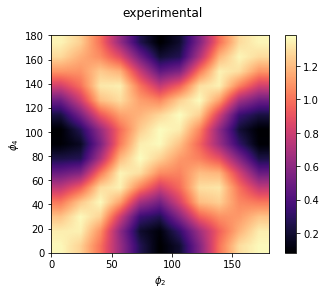

In [5]:
I_experimental=experimental_dict['intensities']
dibujar_2d_fitting(angles_2_e, angles_3_e, I_experimental, title='experimental')

## Parte numérica

In [6]:
#Light source: circular polarization
param_u0, u0 =get_light_parameters()
[amplitude, angle, phase]=param_u0
print(u0)

[[ 3.5431]
 [-0.0246]
 [ 0.0126]
 [ 3.5429]]


In [14]:
pol_dicts=get_polarimeter_parameters(kind='exp')
#real, ideal, exp

pprint.pprint(pol_dicts)

[{'p0': 0.128856857551,
  'p1': 0.935181526985,
  'theta_axis': 0.048659779545601904},
 {'a': 1.0, 'b': 0.954, 'delta': 1.4686945655532284, 'theta_axis': 0},
 {'a': 1.0, 'b': 0.954, 'delta': 1.4686945655532284, 'theta_axis': 0},
 {'p0': 0.128856857551,
  'p1': 0.935181526985,
  'theta_axis': 2.8253389931284207}]


In [15]:
is_polarizer=[True,True, True,True]

P = polarimeter_matrices(pol_dicts, angles=[0,0,0,90*degrees])
for i in range(len(P)):
    if is_polarizer[i] is True:
        pprint.pprint(P[i])

#ejemplo de uso
param_u0, u0 =get_light_parameters()

intensity_0, M = polarimeter_matrix(P, is_present=is_polarizer, 
        angles=[0.*degrees, 45.191*degrees, 132.4784*degrees, 93.9192*degrees],u0=u0)
print(intensity_0)

matrix([[0.4456, 0.429 , 0.    , 0.    ],
        [0.429 , 0.4456, 0.    , 0.    ],
        [0.    , 0.    , 0.1205, 0.    ],
        [0.    , 0.    , 0.    , 0.1205]])
matrix([[ 0.9551,  0.0449,  0.    ,  0.    ],
        [ 0.0449,  0.0449,  0.    ,  0.    ],
        [ 0.    ,  0.    ,  0.0972,  0.949 ],
        [ 0.    ,  0.    , -0.949 ,  0.0972]])
matrix([[ 0.9551,  0.0449,  0.    ,  0.    ],
        [ 0.0449,  0.0449,  0.    ,  0.    ],
        [ 0.    ,  0.    ,  0.0972,  0.949 ],
        [ 0.    ,  0.    , -0.949 ,  0.0972]])
matrix([[ 0.4456, -0.429 ,  0.    ,  0.    ],
        [-0.429 ,  0.4456, -0.    ,  0.    ],
        [ 0.    , -0.    ,  0.1205,  0.    ],
        [ 0.    ,  0.    ,  0.    ,  0.1205]])
1.2041076841290659


0.19010145168827852


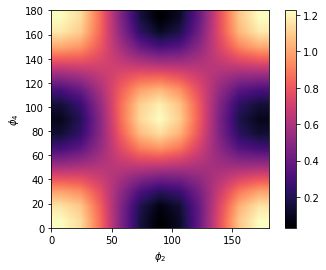

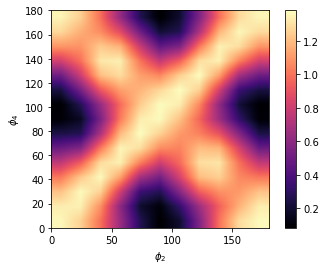

In [18]:
is_polarizer=[True,True, True,True]
Angles_2, Angles_3 = sp.meshgrid(angles_2_e, angles_3_e)
I_numerica=sp.zeros_like(Angles_2, dtype=float)

for i2, angle_2 in enumerate(angles_2_e):
    for i3, angle_3 in enumerate(angles_3_e):
        I_numerica[i3,i2], M = polarimeter_matrix(P, is_present=is_polarizer, 
                       angles=[0.*degrees, angle_2-45.191*degrees, angle_3-132.4784*degrees, 93.9192*degrees], u0=u0)
dibujar_2d_fitting(angles_2_e, angles_3_e, I_numerica)
dibujar_2d_fitting(angles_2_e, angles_3_e, I_experimental)
# dibujar_2d_fitting(angles_2_e, angles_3_e, abs(I_experimental-I_numerica))
print(sp.std(abs(I_experimental-I_numerica)))


##  Ajuste sencillo

Definimos una función que genera la distribución de intensidad, que es la que intentamos optimizar, introducimos los parámetros que ya tenemos conocidos como valores fijos, no se optimizan.

## Definición de funcion de ajuste

In [19]:
[amplitude, angle, phase], u0= get_light_parameters()
print(u0)

[[ 3.5431]
 [-0.0246]
 [ 0.0126]
 [ 3.5429]]


In [20]:
pol_dicts =get_polarimeter_parameters(kind='exp')
pol1,pol2,pol3,pol4 = pol_dicts

pprint.pprint(pol_dicts)
print("______")

P1_0,P2_0,P3_0,P4_0=polarimeter_matrices(pol_dicts, angles=[0,0,0,0*degrees])
pprint.pprint(P1_0)
pprint.pprint(P2_0)
pprint.pprint(P3_0)
pprint.pprint(P4_0)
print("______")
P1,P2,P3,P4=polarimeter_matrices(pol_dicts, angles=None)
pprint.pprint(P1)
pprint.pprint(P2)
pprint.pprint(P3)
pprint.pprint(P4)
print("______")


[{'p0': 0.128856857551,
  'p1': 0.935181526985,
  'theta_axis': 0.048659779545601904},
 {'a': 1.0, 'b': 0.954, 'delta': 1.4686945655532284, 'theta_axis': 0},
 {'a': 1.0, 'b': 0.954, 'delta': 1.4686945655532284, 'theta_axis': 0},
 {'p0': 0.128856857551,
  'p1': 0.935181526985,
  'theta_axis': 2.8253389931284207}]
______
matrix([[0.4456, 0.429 , 0.    , 0.    ],
        [0.429 , 0.4456, 0.    , 0.    ],
        [0.    , 0.    , 0.1205, 0.    ],
        [0.    , 0.    , 0.    , 0.1205]])
matrix([[ 0.9551,  0.0449,  0.    ,  0.    ],
        [ 0.0449,  0.0449,  0.    ,  0.    ],
        [ 0.    ,  0.    ,  0.0972,  0.949 ],
        [ 0.    ,  0.    , -0.949 ,  0.0972]])
matrix([[ 0.9551,  0.0449,  0.    ,  0.    ],
        [ 0.0449,  0.0449,  0.    ,  0.    ],
        [ 0.    ,  0.    ,  0.0972,  0.949 ],
        [ 0.    ,  0.    , -0.949 ,  0.0972]])
matrix([[0.4456, 0.429 , 0.    , 0.    ],
        [0.429 , 0.4456, 0.    , 0.    ],
        [0.    , 0.    , 0.1205, 0.    ],
        [0.   

In [24]:
def get_intensity_numerical_simple(par_fitting, angles_2, angles_3, u0):
    """
    par_fitting es sobre la lámina retardadora
    par_fitting = ( a, b, delta, angle_2, angle_3)
    """
    a, b, delta, angle_2_pol, angle_3_pol = par_fitting
    is_polarizer=[True, True, True, True]
    
    P1=polarizer_linear(p1=pol1['p0'], p2=pol1['p1'], theta=0)
    P2=diattenuating_retarder(p1=a, p2=b, phase=delta, theta=0)
    P3=diattenuating_retarder(p1=a, p2=b, phase=delta, theta=0)
    P4=polarizer_linear(p1=pol4['p0'], p2=pol4['p1'], theta=0*degrees)
    Angles_2, Angles_3 = sp.meshgrid(angles_2, angles_3)
    intensity_numerical=sp.zeros_like(Angles_2, dtype=float)

    for i2, angle_2 in enumerate(angles_2):
        P2_r =rotate_mueller(P2, angle_2-angle_2_pol)
        for i3, angle_3 in enumerate(angles_3):
            P3_r =rotate_mueller(P3, angle_3-angle_2_pol)
            intensity_numerical[i3,i2]= intensity(P4*P3_r*P2_r*P1*u0)
    return intensity_numerical

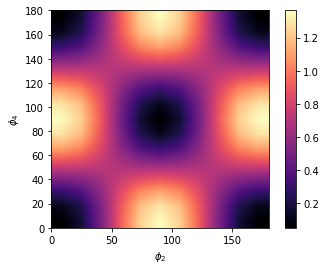

In [28]:
par_example=[1,1,90*degrees,45.191*degrees, 132.4784*degrees]
Ie=get_intensity_numerical_simple(par_example, angles_2_e, 
                                       angles_3_e, u0)
dibujar_2d_fitting(angles_2_e, angles_3_e, Ie)

In [29]:
def err_func(par_error, angles_2_e, angles_3_e, u0, I_experimental):
    I_theory=get_intensity_numerical_simple(par_error, angles_2_e, angles_3_e, u0)
    return (abs(I_theory -I_experimental ).flatten())

has_example=True
if has_example:
    par_example=[1,1, 90*degrees, 45.191*degrees, 132.4784*degrees]
    error=err_func(par_example, angles_2_e, angles_3_e, u0,I_experimental)
    print(error.mean())

0.6563108222480176


In [30]:
err_func1 = lambda par, a2,a3, u0, y: get_intensity_numerical_simple(par, a2,a3, u0)- y
# Distance to the target function

In [31]:
params_1_ini = np.array([1,1,90*degrees,45.191*degrees, 132.4784*degrees]) # Initial guess for the parameters
params_1_fin, success = optimize.leastsq(err_func, params_1_ini, 
                                         args=(angles_2_e, angles_3_e, u0, I_experimental))

In [32]:
print(success)
print("a={}, b={}, \ndelta={}º, angle2={}º , angle3={}º".format(params_1_fin[0],params_1_fin[1],
                                              params_1_fin[2]/degrees, params_1_fin[3]/degrees,
                                               params_1_fin[4]/degrees                 ))

1
a=0.638317111157, b=1.2125939757, 
delta=189.625966834º, angle2=3.14552755562º , angle3=132.4784º


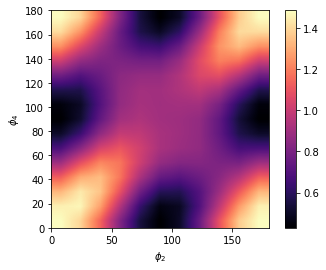

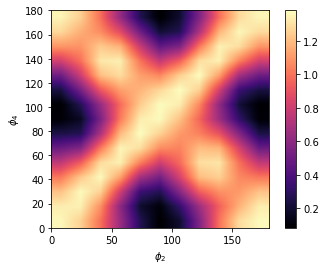

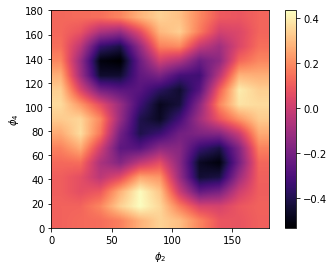

In [33]:
I_best=get_intensity_numerical_simple(params_1_fin, angles_2_e, 
                                       angles_3_e, u0)
dibujar_2d_fitting(angles_2_e, angles_3_e, I_best)
dibujar_2d_fitting(angles_2_e, angles_3_e, I_experimental)
dibujar_2d_fitting(angles_2_e, angles_3_e, I_best-I_experimental)

In [53]:
def get_intensity_numerical_all(par_fitting, angles_1, angles_4, u0):
    """
    par_fitting son los parámetros de optimización, en este caso
        angle_1, angle_2, angle_4, p1, p0, a, b, delta=par_fitting
    """
    
    angle_1_pol, angle_2_pol, angle_4_pol, p1, p0, a, b, delta=par_fitting
    angle_1_pol=0
    a=1
    b=1
    
    P1=polarizer_linear(p1=p1, p2=p0, theta=angle_1_pol)
    P2=diattenuating_retarder(p1=a, p2=b, phase=delta, theta=angle_2_pol)
    P4=polarizer_linear(p1=p1, p2=p0, theta=angle_4_pol)
    is_polarizer=[True, True, False, True]
    
    #P1=polarizer_linear(p1=pol1['p0'], p2=pol1['p1'], theta=pol1['theta_axis'])
  
    Angles_1, Angles_4 = sp.meshgrid(angles_1, angles_4)
    intensity_numerical=sp.zeros_like(Angles_1, dtype=float)

    for i1, angle_1 in enumerate(angles_1):
        P1_r =rotate_mueller(P1, angle_1)
        for i4, angle_4 in enumerate(angles_4):
            P4_r =rotate_mueller(P4, angle_4)
            intensity_numerical[i4,i1]= intensity_numerical[i]=intensity(P4_r*P2*P1_r*u0)
            
    return intensity_numerical


In [54]:
def err_func2(par_error, angles_1, angles_4, u0,I_experimental):
    I_theory=get_intensity_numerical_all(par_error, angles_1, angles_4, u0)
    return (abs(I_theory -I_experimental).flatten())

has_example=True
if has_example:
    params_2_ini=np.array([6*degrees, 6*degrees, 39*degrees, 1,0, 1, 1, 90*degrees])
    error=err_func2(params_2_ini, angles_1_e, angles_4_e, u0,I_experimental)
    print(error.mean())

0.338484637058


In [55]:
params_2_ini=np.array([0*degrees, 6*degrees, 120*degrees, 1,0, 1, 1, 90*degrees])

params_2_fin, success = optimize.leastsq(err_func2, params_2_ini,args=(angles_1_e, angles_4_e, u0, I_experimental))


## Fitting to matrices - 2: completo


In [56]:
#  angle_1, angle_2, angle_4, p1, p0, a, b, delta=par_fitting

print("p0={}, p1={}".format(params_2_fin[4],params_2_fin[3]))
print("a={}, b={}, delta={}".format(params_2_fin[5],
                                     params_2_fin[6],
                                     params_2_fin[7]/degrees))

print("theta_1={}, theta_2={}, theta_4={}".format(params_2_fin[0]/degrees, 
                                                  params_2_fin[1]/degrees, 
                                                  params_2_fin[2]/degrees))

print(params_2_fin)

p0=0.00383043884968, p1=0.951072266176
a=1.0, b=1.0, delta=156.642263262
theta_1=0.0, theta_2=-1.0011038902, theta_4=89.6109822277
[ 0.     -0.0175  1.564   0.9511  0.0038  1.      1.      2.7339]


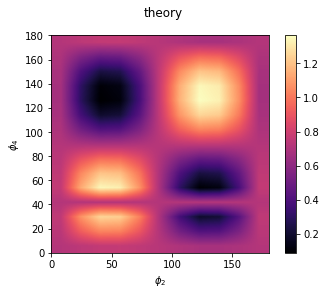

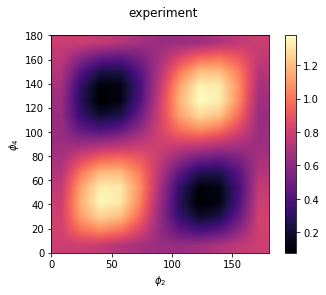

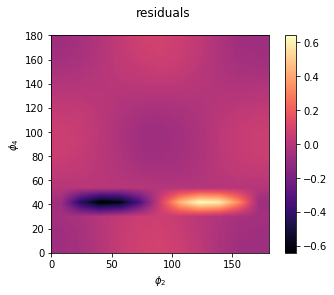

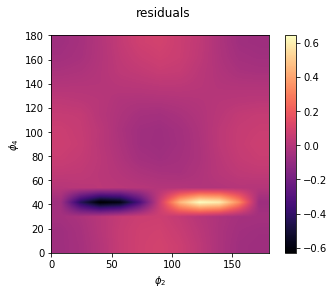

In [57]:
I_best2=get_intensity_numerical_all(params_2_fin, angles_1_e, 
                                       angles_4_e, u0)
dibujar_2d_fitting(angles_1_e, angles_4_e, I_best2, 'theory')
dibujar_2d_fitting(angles_1_e, angles_4_e, I_experimental,'experiment')
dibujar_2d_fitting(angles_1_e, angles_4_e, I_best2-I_experimental, 'residuals')
dibujar_2d_fitting(angles_1_e, angles_4_e, I_best2-I_experimental*I_best2.max()/I_experimental.max(), 'residuals')

## Fitting to matrices - 2: solo angulos


In [35]:
pol_dicts =get_polarimeter_parameters(kind='exp')
p1,p2,p3,p4=pol_dicts
pprint.pprint(pol_dicts)

[{'p0': 0.128856857551,
  'p1': 0.935181526985,
  'theta_axis': 0.048659779545601904},
 {'a': 1.0, 'b': 0.954, 'delta': 1.4686945655532284, 'theta_axis': 0},
 {'a': 1.0, 'b': 0.954, 'delta': 1.4686945655532284, 'theta_axis': 0},
 {'p0': 0.128856857551,
  'p1': 0.935181526985,
  'theta_axis': 2.8253389931284207}]


In [38]:
def get_intensity_numerical_angulos(par_fitting, angles_2, angles_3, u0):
    """
    par_fitting son los parámetros de optimización, en este caso
        angle_1, angle_2, angle_4, p1, p0, a, b, delta=par_fitting
    """
    
    angle_1_pol, angle_2_pol, angle_3_pol, angle_4_pol=par_fitting
   
    P1=polarizer_linear(p1=1, p2=0, theta=0)
    P2=diattenuating_retarder(p1=1, p2=1, phase=86*degrees, theta=angle_2_pol)
    P3=diattenuating_retarder(p1=1, p2=1, phase=86*degrees, theta=angle_3_pol)
    P4=polarizer_linear(p1=1, p2=0, theta=angle_4_pol)
    is_polarizer=[True, True, True, True]
    
    #P1=polarizer_linear(p1=pol1['p0'], p2=pol1['p1'], theta=pol1['theta_axis'])
  
    Angles_2, Angles_3 = sp.meshgrid(angles_2, angles_3)
    intensity_numerical=sp.zeros_like(Angles_2, dtype=float)

    for i2, angle_2 in enumerate(angles_2):
        P2_r =rotate_mueller(P2, angle_2)
        for i3, angle_3 in enumerate(angles_3):
            P3_r =rotate_mueller(P3, angle_3)
            intensity_numerical[i3,i2]= intensity_numerical[i]=intensity(P4*P3_r*P2_r*P1*u0)
            
    return intensity_numerical

0.24761037323717092


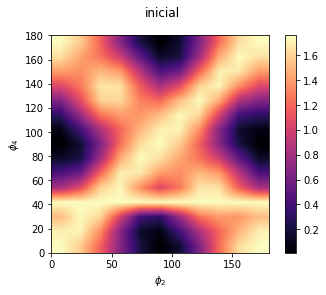

In [39]:
def err_func3(par_error, angles_2, angles_3, u0,I_experimental):
    I_theory=get_intensity_numerical_angulos(par_error, angles_2, angles_3, u0)
    return (abs(I_theory -I_experimental).flatten())

has_example=True
if has_example:
    params_3_ini=np.array([0*degrees, 45.191*degrees, 132.4784*degrees, 0*degrees])
    error=err_func3(params_3_ini, angles_2_e, angles_3_e, u0,I_experimental)
    I_ini_3=get_intensity_numerical_angulos(params_3_ini, angles_2_e, 
                                       angles_3_e, u0)
    dibujar_2d_fitting(angles_2_e, angles_3_e, I_ini_3, 'inicial')
    print(error.mean())

In [40]:
params_3_ini=np.array([0*degrees, 45*degrees, 45*degrees,  0*degrees])

params_3_fin, success = optimize.leastsq(err_func3, params_3_ini,args=(angles_2_e, angles_3_e, u0, I_experimental))

In [41]:
print("""theta_1 = {:4.6}º, 
theta_2 = {:4.6}º, 
theta_3 = {:4.6}º, 
theta_4 = {:4.6}º""".format(params_3_fin[0]/degrees, 
                    params_3_fin[1]/degrees,params_3_fin[2]/degrees,params_3_fin[3]/degrees))

theta_1 =  0.0º, 
theta_2 = 43.5456º, 
theta_3 = 102.548º, 
theta_4 = -22.9048º


In [44]:
print(sp.remainder(params_3_fin, 2*sp.pi)/degrees)
print((params_3_fin[2]-params_3_fin[0])/degrees)
360-337.0952

[  0.      43.5456 102.5478 337.0952]
102.54783893677174


22.904800000000023

1.0609398277835658
0.1699312708825546


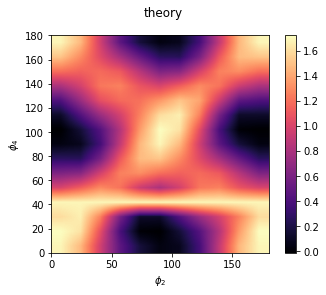

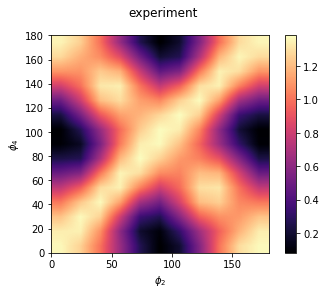

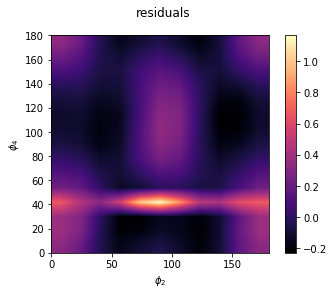

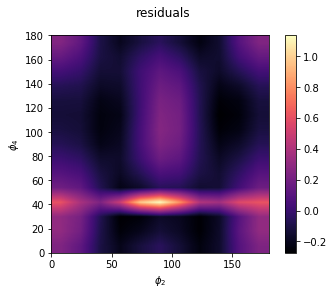

In [47]:
I_best3=get_intensity_numerical_angulos(params_3_fin, angles_2_e, 
                                       angles_3_e, u0)
factor_intensidad=I_best3.sum()/I_experimental.sum()
residuals=I_best3-I_experimental*factor_intensidad
dibujar_2d_fitting(angles_2_e, angles_3_e, I_best3, 'theory')
dibujar_2d_fitting(angles_2_e, angles_3_e, I_experimental,'experiment')
dibujar_2d_fitting(angles_2_e, angles_3_e, I_best3-I_experimental, 'residuals')
dibujar_2d_fitting(angles_2_e, angles_3_e, residuals, 'residuals')
print(factor_intensidad)
print(sp.mean(abs(residuals)))